In [ ]:
import numpy as np
import matplotlib.pyplot as plt

filenames = { i: f'vp004rb_{i}.csv' for i in ['C', 'CO', 'O'] }

RT_C = np.loadtxt(filenames['C'], delimiter=",")
RT_O = np.loadtxt(filenames['O'], delimiter=',')
RT_CO = np.loadtxt(filenames['CO'], delimiter=',')

savepath = './figures/'

### Probability density

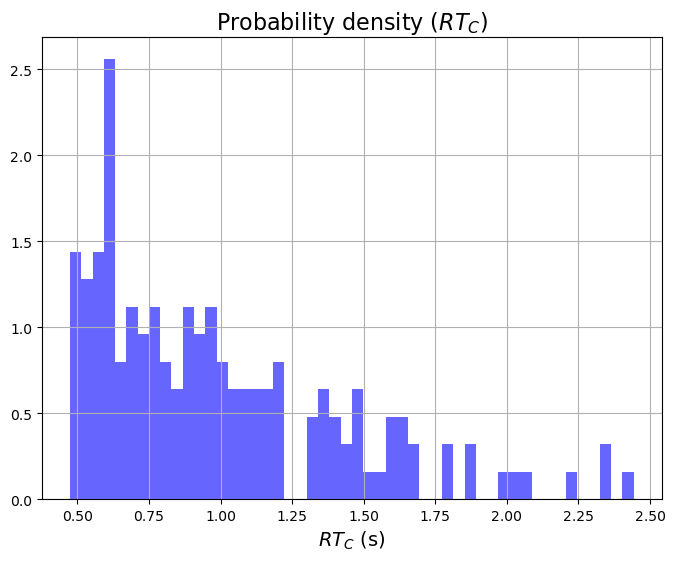

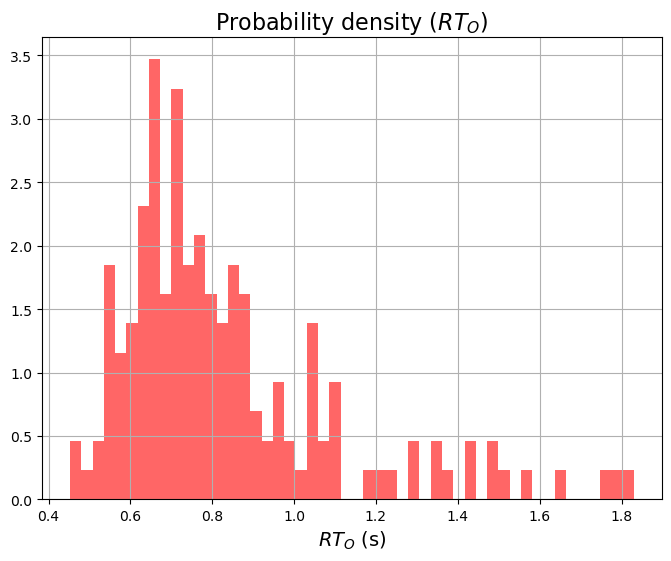

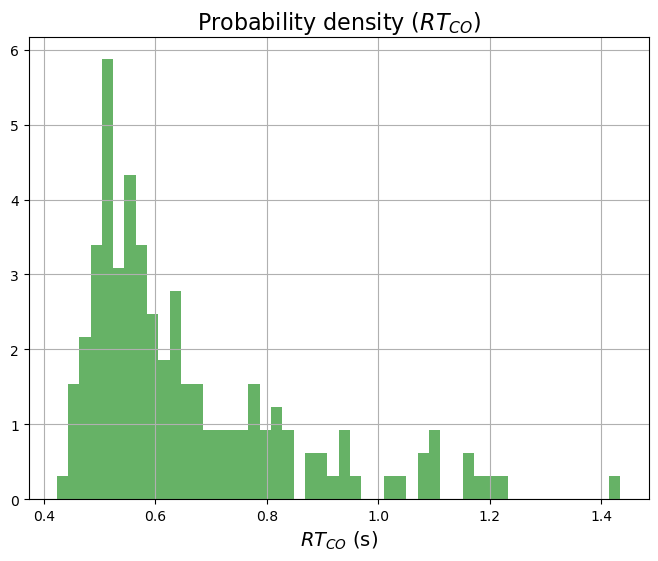

In [2]:
def plot_prob(RT_data, title, xlabel, color = 'blue', save_name = None):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.hist(RT_data, bins=50, density=True, alpha=0.6, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.grid(True)
    if save_name:
        plt.savefig(savepath + save_name + '_prob_density.pdf',
                bbox_inches='tight'
                )
    plt.show()

plot_prob(RT_C, 'Probability density ($RT_{C}$)', '$RT_{C}$ (s)', save_name="RT_C", color='blue')
plot_prob(RT_O, 'Probability density ($RT_{O}$)', '$RT_{O}$ (s)', save_name="RT_O", color='red')
plot_prob(RT_CO, 'Probability density ($RT_{CO}$)', '$RT_{CO}$ (s)', save_name="RT_CO", color='green')

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt

# def plot_prob_multiple(RT_C, RT_O, RT_CO, bins=100):
#     plt.figure(figsize=(10, 6))
    
#     # 计算直方图并归一化为概率密度
#     hist_C, bin_edges = np.histogram(RT_C, bins=bins, density=True)
#     hist_O, _ = np.histogram(RT_O, bins=bin_edges, density=True)
#     hist_CO, _ = np.histogram(RT_CO, bins=bin_edges, density=True)
    
#     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
#     # 绘制折线图
#     plt.plot(bin_centers, hist_C, label='$RT_C$', color='blue')
#     plt.plot(bin_centers, hist_O, label='$RT_O$', color='red')
#     plt.plot(bin_centers, hist_CO, label='$RT_{CO}$', color='green')
    
#     plt.title('Probability density', fontsize=16)
#     plt.xlabel('RT (s)', fontsize=14)
#     plt.ylabel('Probability density', fontsize=14)
#     plt.grid(True)
#     plt.legend()
#     plt.show()

# # 调用
# plot_prob_multiple(RT_C, RT_O, RT_CO)

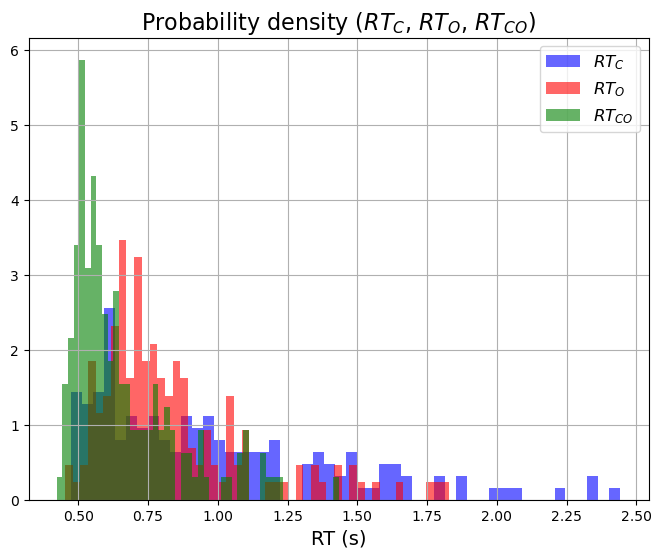

In [5]:
plt.figure(figsize=(8, 6))

bins = 50
alpha = 0.6
plt.hist(RT_C, bins=bins, density=True, alpha=alpha, color='blue', label='$RT_C$')
plt.hist(RT_O, bins=bins, density=True, alpha=alpha, color='red', label='$RT_O$')
plt.hist(RT_CO, bins=bins, density=True, alpha=alpha, color='green', label='$RT_{CO}$')

plt.title('Probability density ($RT_{C}$, $RT_{O}$, $RT_{CO}$)', fontsize=16)
plt.xlabel('RT (s)', fontsize=14)
# plt.ylabel('Probability density', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig(savepath + "Probability_density_histogram.pdf",
            bbox_inches='tight'
            )
plt.show()


### cumulative_distributions


In [5]:
# def plot_cumulative(RT_data, title, xlabel):
#     import matplotlib.pyplot as plt
#     sorted_data = np.sort(RT_data)
#     cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.figure(figsize=(10, 6))
#     plt.plot(sorted_data, cumulative, marker='.', linestyle='none')
#     plt.title(title, fontsize=16)
#     plt.xlabel(xlabel, fontsize=14)
#     plt.grid(True)
#     plt.show()
# plot_cumulative(RT_C, 'Cumulative distribution ($RT_{C}$)', '$RT_{C}$ (s)')
# plot_cumulative(RT_CO, 'Cumulative distribution ($RT_{CO}$)', '$RT_{CO}$ (s)')
# plot_cumulative(RT_O, 'Cumulative distribution ($RT_{O}$)', '$RT_{O}$ (s)')

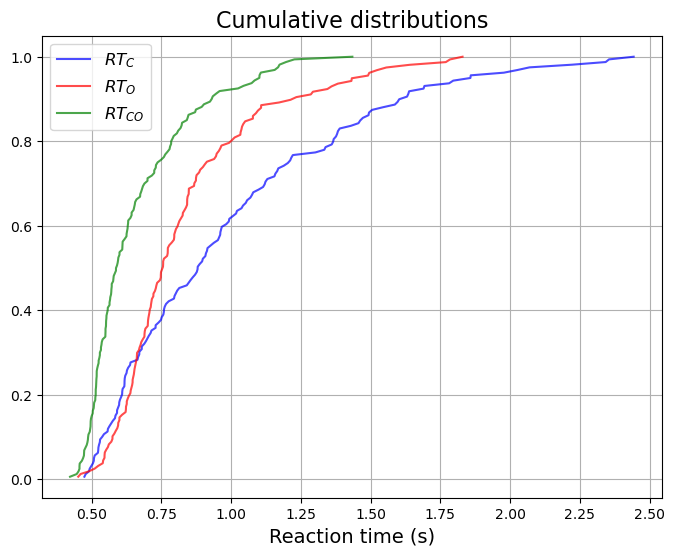

In [4]:

def compute_cdf(data):
    s = np.sort(data)
    c = np.arange(1, len(s) + 1) / len(s)
    return s, c

title= "Cumulative distributions"
xlabel="Reaction time (s)"
xC, yC = compute_cdf(RT_C)
xCO, yCO = compute_cdf(RT_CO)
xO, yO = compute_cdf(RT_O)

plt.figure(figsize=(8, 6))
alpha = 0.7
plt.plot(xC, yC, label="$RT_{C}$", color='blue', alpha=alpha)
plt.plot(xO, yO, label="$RT_{O}$", color='red', alpha=alpha)
plt.plot(xCO, yCO, label="$RT_{CO}$", color='green', alpha=alpha)

plt.title(title, fontsize=16)
plt.xlabel(xlabel, fontsize=14)
# plt.ylabel("Cumulative probability", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.savefig(savepath + "Cumulative_distributions.pdf",
            bbox_inches='tight'
            )
plt.show()


---

### Race model

In [8]:
RT_CO_race = []

for i in range(10000):
    x, y = np.random.choice(RT_C), np.random.choice(RT_O)
    RT_CO_race.append(min(x, y))


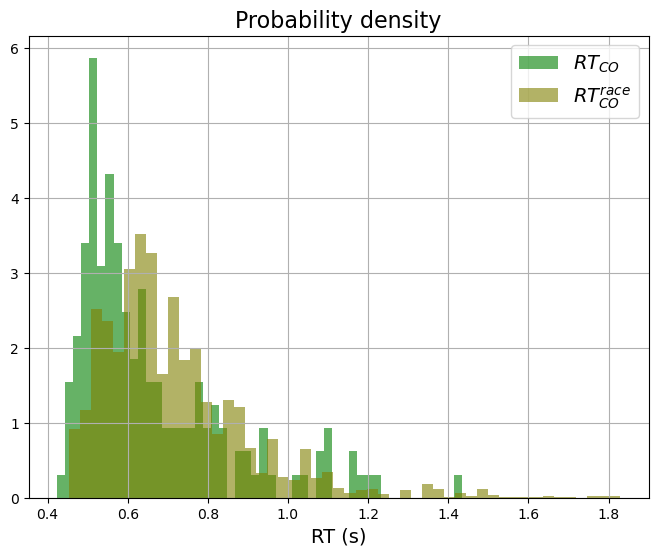

In [39]:
# plot_prob(RT_CO_race, 'Probability density ($RT_{CO}^{race}$)', '$RT_{CO}^{race}$ (s)', "RT_CO_race")

plt.figure(figsize=(8, 6))

bins = 50
alpha = 0.6
plt.hist(RT_CO, bins=bins, density=True, alpha=alpha, color='green', label='$RT_{CO}$')
plt.hist(RT_CO_race, bins=bins, density=True, alpha=alpha, color='olive', label='$RT_{CO}^{race}$')

plt.title('Probability density', fontsize=16)
plt.xlabel('RT (s)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.savefig(savepath + "Probability_density_race.pdf",
            bbox_inches='tight'
            )
plt.show()


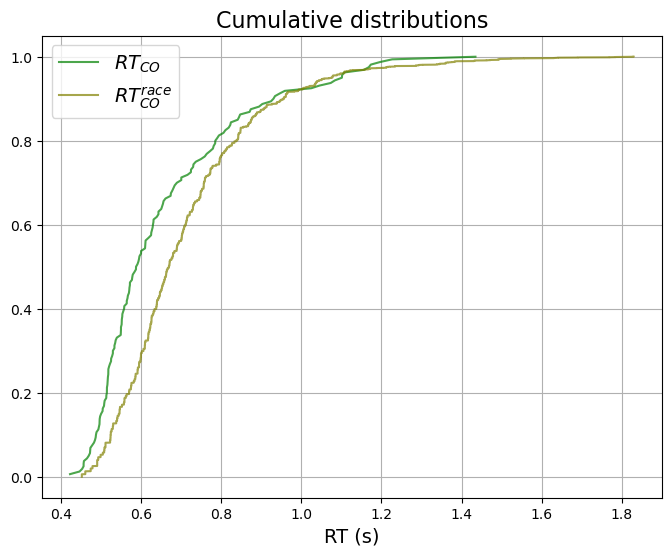

In [40]:
title= "Cumulative distributions"
xlabel="RT (s)"
xCO, yCO = compute_cdf(RT_CO)
xCO_race, yCO_race = compute_cdf(RT_CO_race)

plt.figure(figsize=(8, 6))
alpha = 0.7
plt.plot(xCO, yCO, label="$RT_{CO}$", color='green', alpha=alpha)
plt.plot(xCO_race, yCO_race, label="$RT_{CO}^{race}$", color='olive', alpha=alpha)

plt.title(title, fontsize=16)
plt.xlabel(xlabel, fontsize=14)
# plt.ylabel("Cumulative probability", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.savefig(savepath + "Cumulative_distributions_race.pdf",
            bbox_inches='tight'
            )
plt.show()

### Other comparisons

In [24]:


# scatter plot with error bars for RT_C, RT_O, RT_CO and race model (RT_CO_race)

RT_CO_race_arr = np.array(RT_CO_race)

data_labels = ['$RT_{CO}$', '$RT_{CO}^{race}$']
data_list = [RT_CO, RT_CO_race_arr]
colors = ['green', 'olive']

# compute means and SEMs
means = [d.mean() for d in data_list]
sems = [d.std(ddof=1) / np.sqrt(len(d)) for d in data_list]
medians = [np.median(d) for d in data_list]
iqrs = [np.percentile(d, 75) - np.percentile(d, 25) for d in data_list]

means_str = [f"{m:.3f}" for m in means]
sems_str  = [f"{s:.3f}" for s in sems]
medians_str = [f"{md:.3f}" for md in medians]
iqrs_str = [f"{iqr:.3f}" for iqr in iqrs]
print(f"{'Name':<10} {'Mean':>10} {'SEM':>10} {'Median':>10} {'IQR':>10}")
for name, m, s, median, iqrs in zip(["CO", "CO_race"], means_str, sems_str, medians_str, iqrs_str):
    print(f"{name:<10} {m:>10} {s:>10} {median:>10} {iqrs:>10} ")


from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(RT_CO, RT_CO_race_arr, equal_var=False)
print("t =", t_stat)
print("p =", p_value)
    

Name             Mean        SEM     Median        IQR
CO              0.659      0.015      0.590      0.221 
CO_race         0.714      0.002      0.670      0.205 
t = -3.632002811227078
p = 0.00037570237878546025


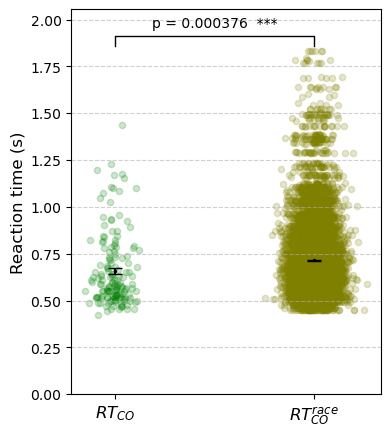

In [38]:
# scatter plot with error bars
x = np.arange(len(data_list))

plt.figure(figsize=(4, 5))

# jittered scatter of individual samples 
for xi, d, c in zip(x, data_list, colors):
    # (subsample large arrays to avoid overplotting)
    # if len(d) > 500:
    #     idx = np.random.choice(len(d), size=200, replace=False)
    #     pts = d[idx]
    # else:
    pts = d
    x_jitter = np.random.normal(loc=xi, scale=0.06, size=pts.shape)
    plt.scatter(x_jitter, pts, alpha=0.2, color=c, s=20, rasterized=True)

# plot means with error bars (SEM)
plt.errorbar(x, means, yerr=sems, fmt='.', color='k', capsize=5, markersize=3, label='mean ± SEM')


# add bracket and p-value annotation between groups
x0, x1 = 0, 1
all_vals = np.concatenate(data_list)
ymin, ymax = np.min(all_vals), np.max(all_vals)
yrange = ymax - ymin if (ymax - ymin) != 0 else 1.0
y = ymax + 0.02 * yrange
h = 0.04 * yrange
plt.plot([x0, x0, x1, x1], [y, y+h, y+h, y], color='k', linewidth=1.0)
plt.text((x0 + x1) / 2, y + h + 0.02 * yrange, f"p = {p_value:.3g}  {'***'}", ha='center', va='bottom', fontsize=10)


plt.xticks(x, data_labels, fontsize=12)
plt.ylabel('Reaction time (s)', fontsize=12)
plt.ylim(bottom=0, top=y + h + 0.1 * yrange)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
# plt.legend(loc='upper right')

plt.savefig(savepath + "scatter_errorbars.pdf", bbox_inches='tight')
plt.show()

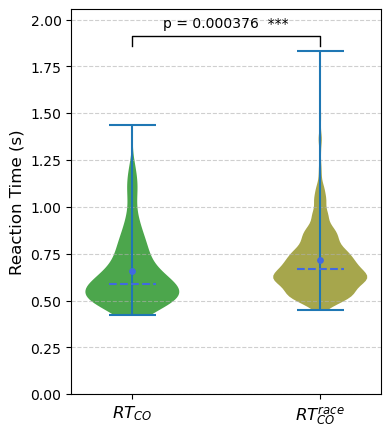

In [34]:
plt.figure(figsize=(4, 5))
parts = plt.violinplot(
    data_list,
    # showmeans=True,
    showextrema=True,
    showmedians=True,
)

# 修改中位数线的风格（更粗、更深）
parts['cmedians'].set_color('royalblue')
parts['cmedians'].set_linestyle('--')
# parts['cmedians'].set_linewidth(2.2)

# # 修改均值线的风格（更细、比如蓝色或虚线）
# parts['cmeans'].set_color('royalblue')
# parts['cmeans'].set_linewidth(1.5)
# parts['cmeans'].set_linestyle('--')

# 为每组数据绘制 mean 点
for i, data in enumerate(data_list):
    mean_val = np.mean(data)
    plt.scatter(
        i+1, mean_val,                # x 位置从 1 开始
        s=15,                         # 点大小
        color='royalblue',                # 颜色
        zorder=10,                    # 放在最上层
    )

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

plt.xticks([1, 2], data_labels, fontsize=12)
plt.ylabel("Reaction Time (s)", fontsize=12)
# plt.title("Distribution Comparison (Violin Plot)", fontsize=14)

x0, x1 = 1, 2
all_vals = np.concatenate(data_list)
ymin, ymax = np.min(all_vals), np.max(all_vals)
yrange = ymax - ymin if (ymax - ymin) != 0 else 1.0
y = ymax + 0.02 * yrange
h = 0.04 * yrange
plt.plot([x0, x0, x1, x1], [y, y+h, y+h, y], color='k', linewidth=1.0)
plt.text((x0 + x1) / 2, y + h + 0.02 * yrange, f"p = {p_value:.3g}  {'***'}", ha='center', va='bottom', fontsize=10)

plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.ylim(bottom=0, top=y + h + 0.1 * yrange)
plt.savefig(savepath + "violin_plot.pdf", bbox_inches='tight')
plt.show()

### 